In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import r2_score
from termcolor import colored

In [2]:
SAVE_PATH = "./betaVAE_results/"
BETAS = [0.1, 1, 2, 4, 8, 16]
NB_BINS = 20

## I. Disentanglement Scores

In [3]:
# Load the continuous and discrete ground truth factors for different beta values
train_latent_values_beta_01 = np.load(f'{SAVE_PATH}train_latent_values_beta_0.1.npy')
train_latent_values_beta_1 = np.load(f'{SAVE_PATH}train_latent_values_beta_1.npy')
train_latent_values_beta_2 = np.load(f'{SAVE_PATH}train_latent_values_beta_2.npy')
train_latent_values_beta_4 = np.load(f'{SAVE_PATH}train_latent_values_beta_4.npy')
train_latent_values_beta_8 = np.load(f'{SAVE_PATH}train_latent_values_beta_8.npy')
train_latent_values_beta_16 = np.load(f'{SAVE_PATH}train_latent_values_beta_16.npy')

train_latent_classes_beta_01 = np.load(f'{SAVE_PATH}train_latent_classes_beta_0.1.npy')
train_latent_classes_beta_1 = np.load(f'{SAVE_PATH}train_latent_classes_beta_1.npy')
train_latent_classes_beta_2 = np.load(f'{SAVE_PATH}train_latent_classes_beta_2.npy')
train_latent_classes_beta_4 = np.load(f'{SAVE_PATH}train_latent_classes_beta_4.npy')
train_latent_classes_beta_8 = np.load(f'{SAVE_PATH}train_latent_classes_beta_8.npy')
train_latent_classes_beta_16 = np.load(f'{SAVE_PATH}train_latent_classes_beta_16.npy')

val_latent_values_beta_01 = np.load(f'{SAVE_PATH}val_latent_values_beta_0.1.npy')
val_latent_values_beta_1 = np.load(f'{SAVE_PATH}val_latent_values_beta_1.npy')
val_latent_values_beta_2 = np.load(f'{SAVE_PATH}val_latent_values_beta_2.npy')
val_latent_values_beta_4 = np.load(f'{SAVE_PATH}val_latent_values_beta_4.npy')
val_latent_values_beta_8 = np.load(f'{SAVE_PATH}val_latent_values_beta_8.npy')
val_latent_values_beta_16 = np.load(f'{SAVE_PATH}val_latent_values_beta_16.npy')

val_latent_classes_beta_01 = np.load(f'{SAVE_PATH}val_latent_classes_beta_0.1.npy')
val_latent_classes_beta_1 = np.load(f'{SAVE_PATH}val_latent_classes_beta_1.npy')
val_latent_classes_beta_2 = np.load(f'{SAVE_PATH}val_latent_classes_beta_2.npy')
val_latent_classes_beta_4 = np.load(f'{SAVE_PATH}val_latent_classes_beta_4.npy')
val_latent_classes_beta_8 = np.load(f'{SAVE_PATH}val_latent_classes_beta_8.npy')
val_latent_classes_beta_16 = np.load(f'{SAVE_PATH}val_latent_classes_beta_16.npy')

In [4]:
# Load mu and std for different beta values
train_mu_beta_01 = np.load(f'{SAVE_PATH}train_mu_beta_0.1.npy')
train_mu_beta_1 = np.load(f'{SAVE_PATH}train_mu_beta_1.npy')
train_mu_beta_2 = np.load(f'{SAVE_PATH}train_mu_beta_2.npy')
train_mu_beta_4 = np.load(f'{SAVE_PATH}train_mu_beta_4.npy')
train_mu_beta_8 = np.load(f'{SAVE_PATH}train_mu_beta_8.npy')
train_mu_beta_16 = np.load(f'{SAVE_PATH}train_mu_beta_16.npy')

train_std_beta_01 = np.load(f'{SAVE_PATH}train_std_beta_0.1.npy')
train_std_beta_1 = np.load(f'{SAVE_PATH}train_std_beta_1.npy')
train_std_beta_2 = np.load(f'{SAVE_PATH}train_std_beta_2.npy')
train_std_beta_4 = np.load(f'{SAVE_PATH}train_std_beta_4.npy')
train_std_beta_8 = np.load(f'{SAVE_PATH}train_std_beta_8.npy')
train_std_beta_16 = np.load(f'{SAVE_PATH}train_std_beta_16.npy')

val_mu_beta_01 = np.load(f'{SAVE_PATH}val_mu_beta_0.1.npy')
val_mu_beta_1 = np.load(f'{SAVE_PATH}val_mu_beta_1.npy')
val_mu_beta_2 = np.load(f'{SAVE_PATH}val_mu_beta_2.npy')
val_mu_beta_4 = np.load(f'{SAVE_PATH}val_mu_beta_4.npy')
val_mu_beta_8 = np.load(f'{SAVE_PATH}val_mu_beta_8.npy')
val_mu_beta_16 = np.load(f'{SAVE_PATH}val_mu_beta_16.npy')

val_std_beta_01 = np.load(f'{SAVE_PATH}val_std_beta_0.1.npy')
val_std_beta_1 = np.load(f'{SAVE_PATH}val_std_beta_1.npy')
val_std_beta_2 = np.load(f'{SAVE_PATH}val_std_beta_2.npy')
val_std_beta_4 = np.load(f'{SAVE_PATH}val_std_beta_4.npy')
val_std_beta_8 = np.load(f'{SAVE_PATH}val_std_beta_8.npy')
val_std_beta_16 = np.load(f'{SAVE_PATH}val_std_beta_16.npy')

# Reparameterization trick
def reparameterize(mu, std):
    return mu + std * np.random.randn(*mu.shape)

# Compute latent variables for each beta value explicitly
train_latent_variables_beta_01 = reparameterize(train_mu_beta_01, train_std_beta_01)
train_latent_variables_beta_1 = reparameterize(train_mu_beta_1, train_std_beta_1)
train_latent_variables_beta_2 = reparameterize(train_mu_beta_2, train_std_beta_2)
train_latent_variables_beta_4 = reparameterize(train_mu_beta_4, train_std_beta_4)
train_latent_variables_beta_8 = reparameterize(train_mu_beta_8, train_std_beta_8)
train_latent_variables_beta_16 = reparameterize(train_mu_beta_16, train_std_beta_16)

val_latent_variables_beta_01 = reparameterize(val_mu_beta_01, val_std_beta_01)
val_latent_variables_beta_1 = reparameterize(val_mu_beta_1, val_std_beta_1)
val_latent_variables_beta_2 = reparameterize(val_mu_beta_2, val_std_beta_2)
val_latent_variables_beta_4 = reparameterize(val_mu_beta_4, val_std_beta_4)
val_latent_variables_beta_8 = reparameterize(val_mu_beta_8, val_std_beta_8)
val_latent_variables_beta_16 = reparameterize(val_mu_beta_16, val_std_beta_16)

### 1. MIG and I10 Scores

In [5]:
def compute_joint_probabilities(x, y):
    """
    Compute the joint probability matrix for two discrete variables.

    Args:
        x (np.ndarray): First discrete variable.
        y (np.ndarray): Second discrete variable.

    Returns:
        np.ndarray: Joint probability matrix.
    """
    joint_hist = np.histogram2d(x, y, bins=(np.unique(x).size, np.unique(y).size))[0]
    joint_prob = joint_hist / np.sum(joint_hist)
    return joint_prob

def compute_marginal_probabilities(joint_prob):
    """
    Compute the marginal probabilities P(x) and P(y) from the joint probability matrix.

    Args:
        joint_prob (np.ndarray): Joint probability matrix.

    Returns:
        tuple: Marginal probabilities P(x) and P(y).
    """
    marginal_x = np.sum(joint_prob, axis=1)  # P(x)
    marginal_y = np.sum(joint_prob, axis=0)  # P(y)
    return marginal_x, marginal_y

def get_mutual_information(x, y, eps=1e-10):
    """
    Compute mutual information between two discrete variables.

    Args:
        x (np.ndarray): First discrete variable.
        y (np.ndarray): Second discrete variable.
        eps (float): Small constant to avoid division by zero.

    Returns:
        float: Mutual information between x and y.
    """
    joint_prob = compute_joint_probabilities(x, y)
    marginal_x, marginal_y = compute_marginal_probabilities(joint_prob)
    
    mi = 0.0
    for i in range(joint_prob.shape[0]):
        for j in range(joint_prob.shape[1]):
            if joint_prob[i, j] > 0:
                mi += joint_prob[i, j] * np.log((joint_prob[i, j] + eps) / (marginal_x[i] * marginal_y[j] + eps))
    return mi

def compute_entropy(x):
    """
    Compute the entropy of a discrete variable.

    Args:
        x (np.ndarray): Discrete variable.

    Returns:
        float: Entropy of the variable.
    """
    value_counts = np.bincount(x)
    probabilities = value_counts / len(x)
    entropy = -np.sum(probabilities[probabilities > 0] * np.log(probabilities[probabilities > 0]))
    return entropy

def quantile_based_discretize(latents, nb_bins):
    """
    Discretize continuous latent variables using quantile-based binning (equal frequency).

    Args:
        latents (np.ndarray): Continuous latent variables.
        nb_bins (int): Number of bins for discretization.

    Returns:
        np.ndarray: Discretized latent variables.
    """
    discretizer = KBinsDiscretizer(n_bins=nb_bins, encode='ordinal', strategy='quantile')
    latents_discretized = discretizer.fit_transform(latents)
    return latents_discretized.astype(int)

def mig_score(factors, latents, nb_bins, beta, is_val):
    """
    Compute the MIG score and create a heatmap of mutual information between factors and latents.

    Args:
        factors (np.ndarray): Discrete ground truth factors (e.g., shape, scale, orientation, posX, posY).
        latents (np.ndarray): Continuous latent variables.
        nb_bins (int): Number of bins to discretize latent variables.
        beta (float): Fixed beta value for the computation.
        is_val (int): Flag to indicate whether the computation is for validation (1) or training (0).

    Returns:
        tuple: MIG score and I10 score.
    """
    nb_factors = factors.shape[1]
    nb_latents = latents.shape[1]

    # Discretize continuous latent variables using quantile-based binning
    latents_discretized = quantile_based_discretize(latents, nb_bins)
    
    # Compute mutual information (MI) matrix
    mi_matrix = np.zeros((nb_factors, nb_latents))
    for f in range(nb_factors):
        for l in range(nb_latents):
            mi_matrix[f, l] = get_mutual_information(factors[:, f], latents_discretized[:, l])

    # Compute entropy of each factor
    entropy_factors = np.array([compute_entropy(factors[:, f]) for f in range(nb_factors)])  
    
    # Plot the MI matrix as a heatmap
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(mi_matrix, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Mutual Information'})

    ax.set_xlabel('Latent Space Dimensions', fontsize=12)
    ax.set_ylabel('Ground Truth Factors', fontsize=12)
    ax.set_xticks(np.arange(nb_latents) + 0.5)
    ax.set_yticks(np.arange(nb_factors) + 0.5)

    ax.set_xticklabels([f'$x_{{{i+1}}}$' for i in range(nb_latents)], fontsize=10)
    ax.set_yticklabels(['Shape', 'Scale', 'Orientation', 'PosX', 'PosY'], fontsize=10)
    
    # Save the plot
    plt.tight_layout()

    if is_val == 1:
        plt.savefig(f"{SAVE_PATH}val_mutual_info_beta_{beta}.png", bbox_inches='tight')
    else:
        plt.savefig(f"{SAVE_PATH}train_mutual_info_beta_{beta}.png", bbox_inches='tight')

    # Compute the MIG score
    sum_gap = 0
    I10_score = 0
    
    for f in range(nb_factors):
        mi_f_sorted = np.sort(mi_matrix[f, :])[::-1]  # Sort MI for factor f in descending order
        gap = mi_f_sorted[0] - mi_f_sorted[1]  # Gap between highest and second-highest MI
        sum_gap += gap / entropy_factors[f]  # Normalize by the entropy of the factor  

        # Compute I10 score
        I10_score += mi_f_sorted[0]
        
    mig_score = round(sum_gap / nb_factors, 4)  # Average across all factors
    I10_score = round(I10_score, 4)

    if is_val == 1:
        print(colored(f"Computing validation MIG and I10 scores for beta = {beta}...", "red", attrs=['bold']))
    else:
        print(colored(f"Computing training MIG and I10 scores for beta = {beta}...", "blue", attrs=['bold']))
        
    print(colored(f"MIG Score: {mig_score}", attrs=['bold']))
    print(colored(f"I10 Score: {I10_score}", attrs=['bold']))
    
    return mig_score, I10_score

Computing training MIG and I10 scores for beta = 0.1...
MIG Score: 0.0527
I10 Score: 1.6417
Computing training MIG and I10 scores for beta = 1...
MIG Score: 0.0602
I10 Score: 1.6525
Computing training MIG and I10 scores for beta = 2...
MIG Score: 0.08
I10 Score: 2.1011
Computing training MIG and I10 scores for beta = 4...
MIG Score: 0.3195
I10 Score: 5.6205
Computing training MIG and I10 scores for beta = 8...
MIG Score: 0.3593
I10 Score: 5.8784
Computing training MIG and I10 scores for beta = 16...
MIG Score: 0.3319
I10 Score: 5.0338
Computing validation MIG and I10 scores for beta = 0.1...
MIG Score: 0.0526
I10 Score: 1.6568
Computing validation MIG and I10 scores for beta = 1...
MIG Score: 0.0593
I10 Score: 1.6571
Computing validation MIG and I10 scores for beta = 2...
MIG Score: 0.0795
I10 Score: 2.1068
Computing validation MIG and I10 scores for beta = 4...
MIG Score: 0.3186
I10 Score: 5.625
Computing validation MIG and I10 scores for beta = 8...
MIG Score: 0.36
I10 Score: 5.8925


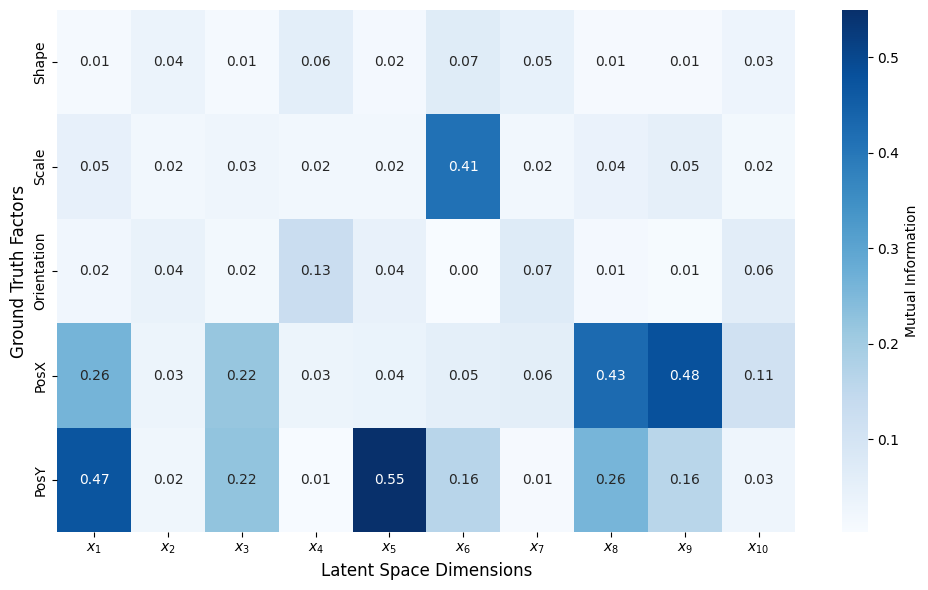

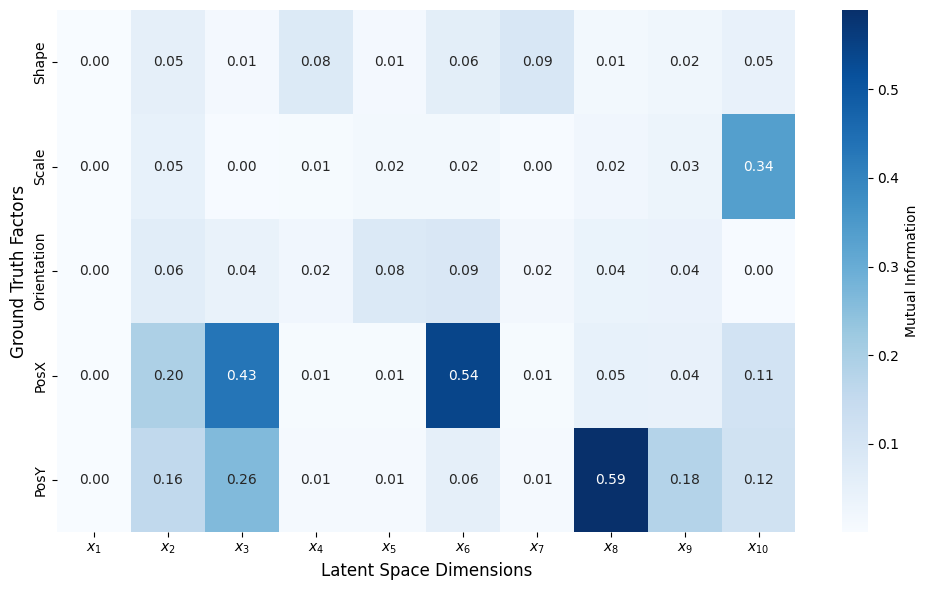

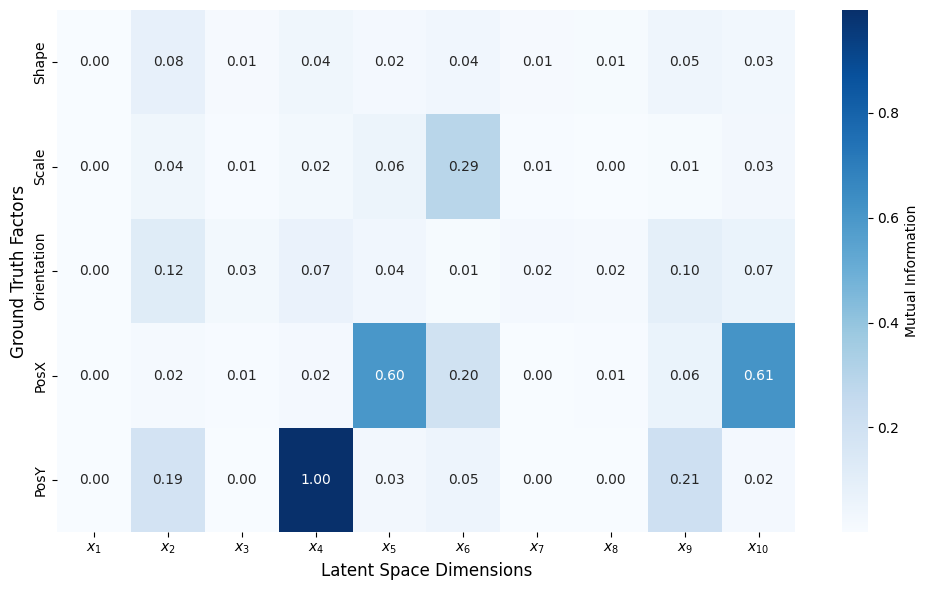

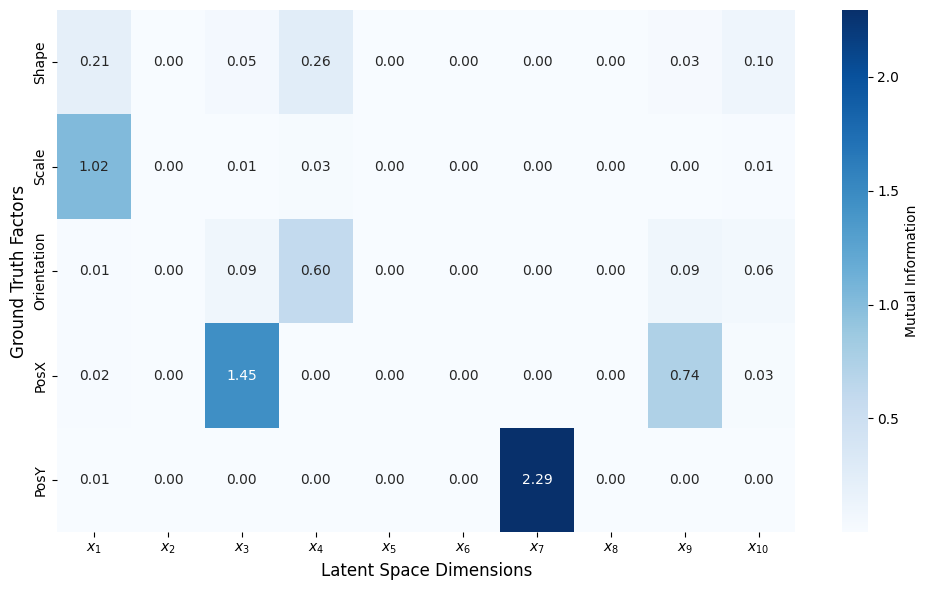

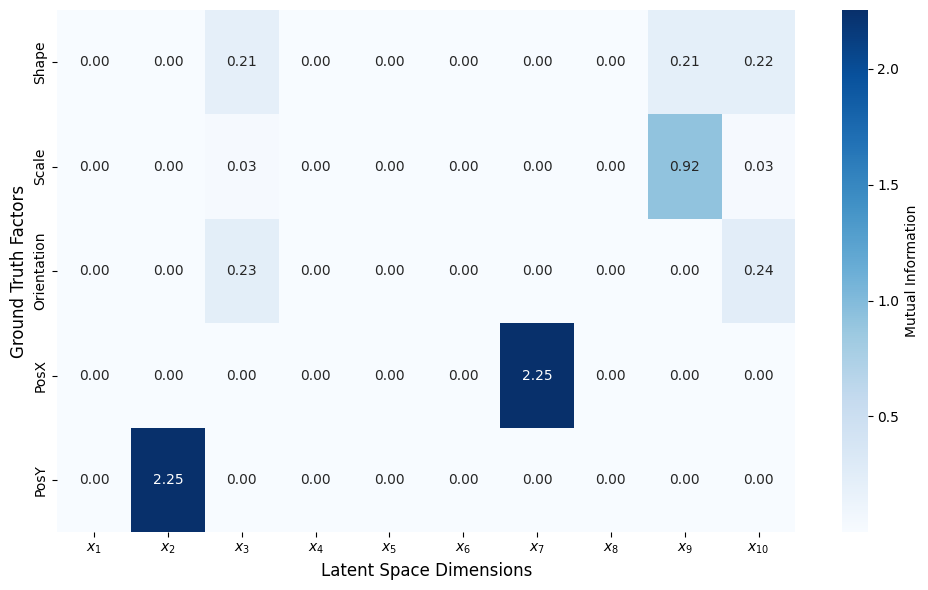

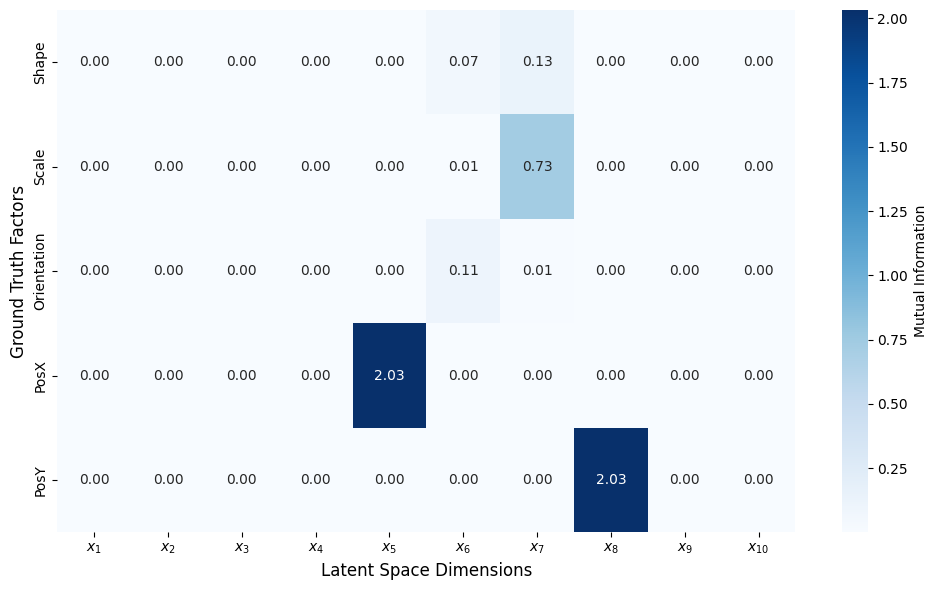

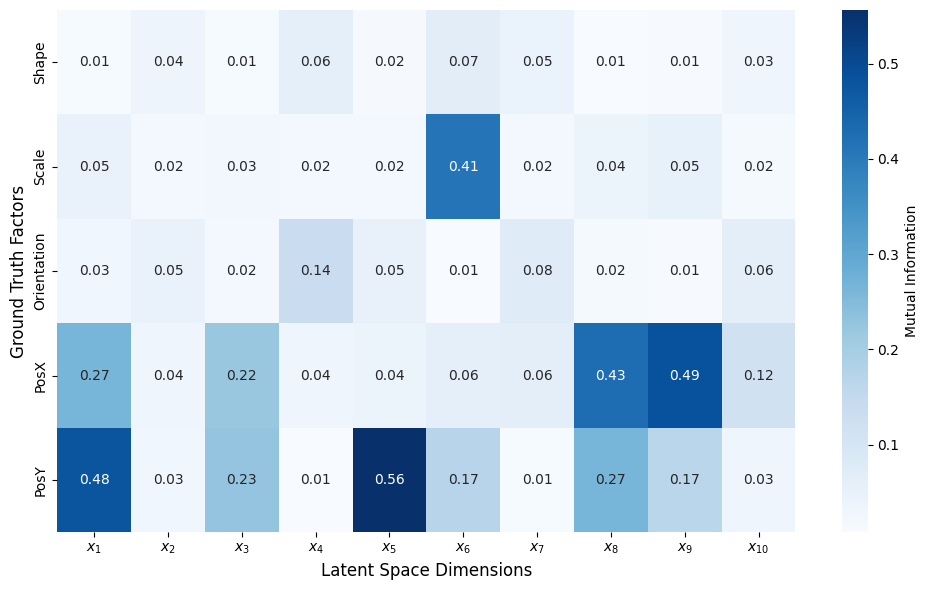

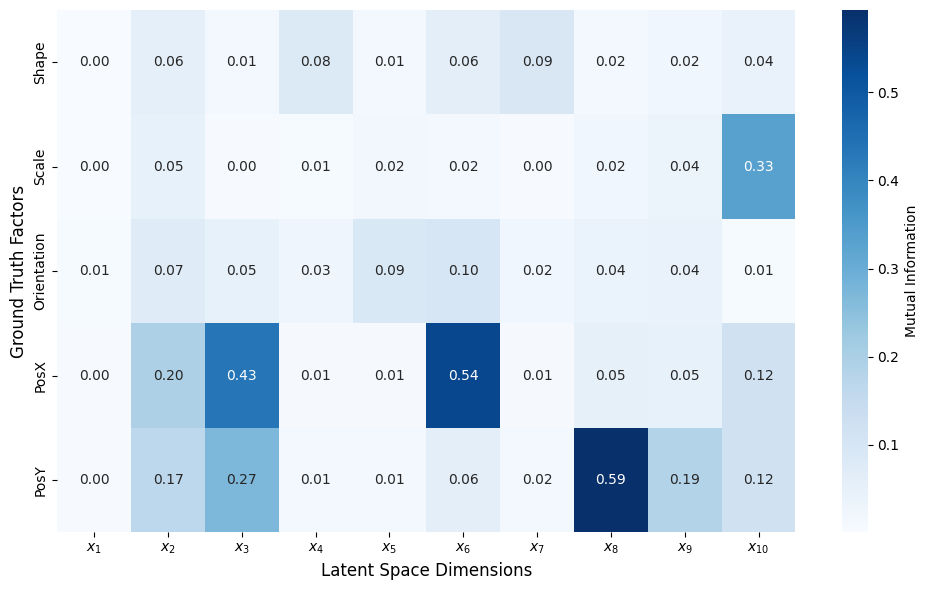

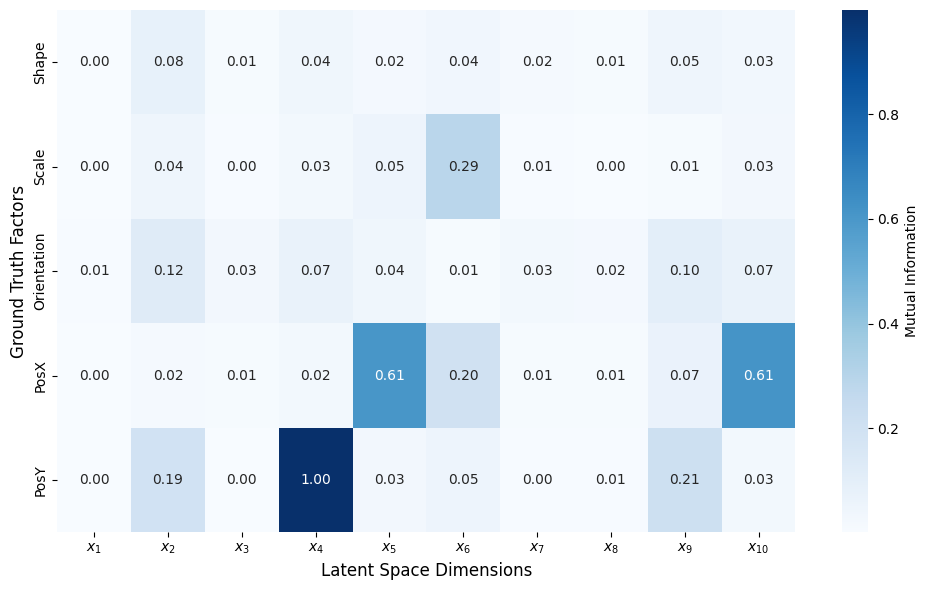

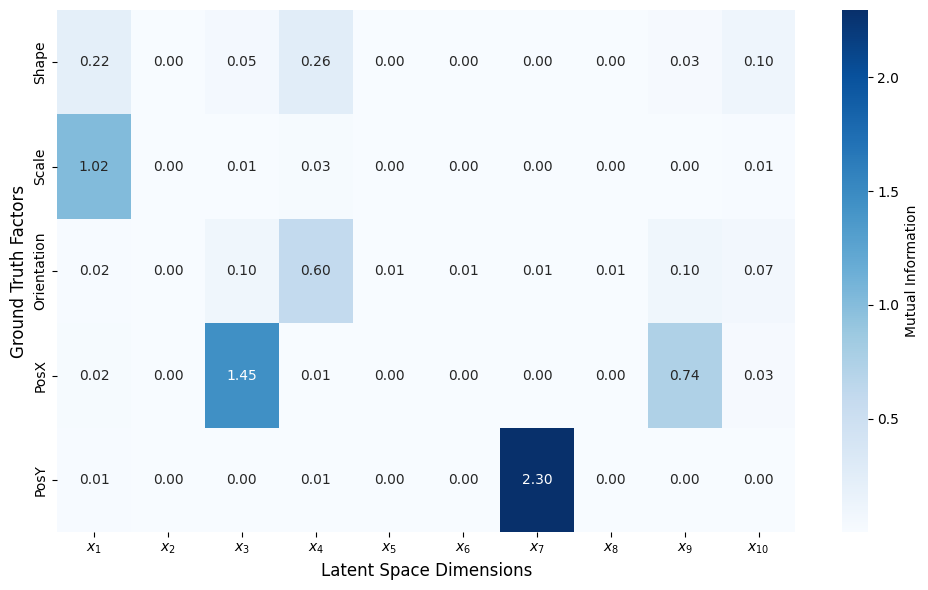

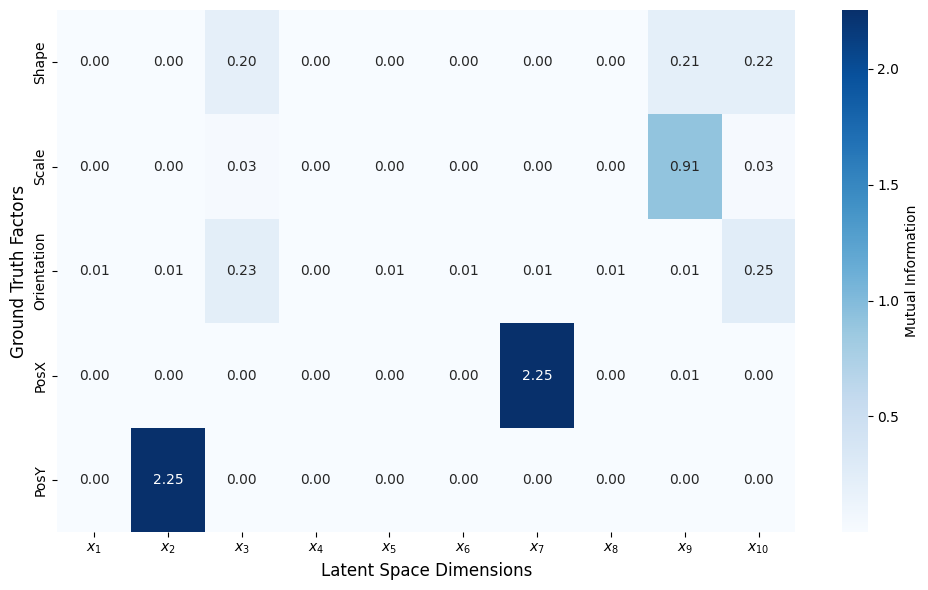

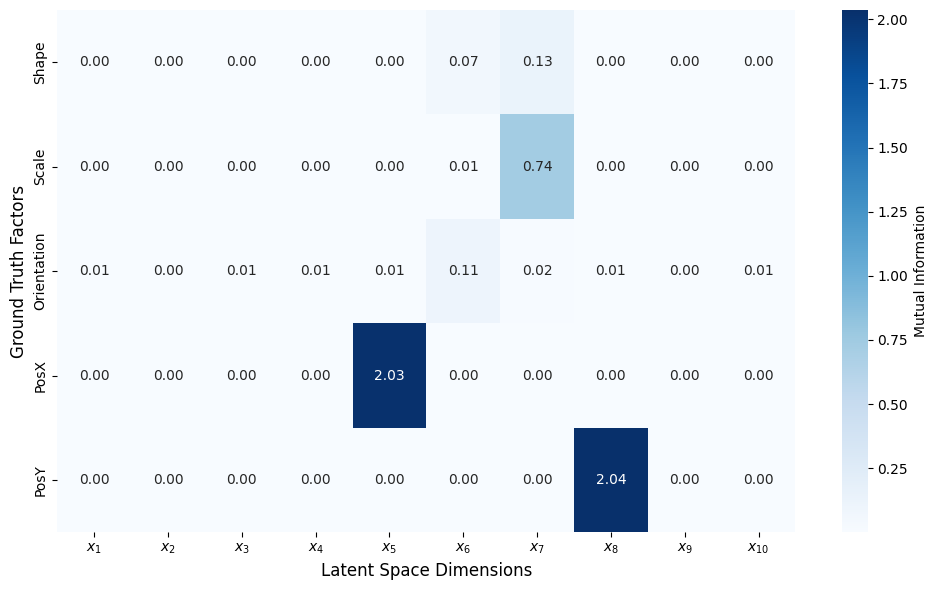

In [6]:
# Training MIG and I10 scores
train_mig_score_beta_01, train_I10_score_beta_01 = mig_score(train_latent_classes_beta_01, train_latent_variables_beta_01, NB_BINS, 0.1, 0)
train_mig_score_beta_1, train_I10_score_beta_1 = mig_score(train_latent_classes_beta_1, train_latent_variables_beta_1, NB_BINS, 1, 0)
train_mig_score_beta_2, train_I10_score_beta_2 = mig_score(train_latent_classes_beta_2, train_latent_variables_beta_2, NB_BINS, 2, 0)
train_mig_score_beta_4, train_I10_score_beta_4 = mig_score(train_latent_classes_beta_4, train_latent_variables_beta_4, NB_BINS, 4, 0)
train_mig_score_beta_8, train_I10_score_beta_8 = mig_score(train_latent_classes_beta_8, train_latent_variables_beta_8, NB_BINS, 8, 0)
train_mig_score_beta_16, train_I10_score_beta_16 = mig_score(train_latent_classes_beta_16, train_latent_variables_beta_16, NB_BINS, 16, 0)

# Validation MIG and I10 scores
val_mig_score_beta_01, val_I10_score_beta_01 = mig_score(val_latent_classes_beta_01, val_latent_variables_beta_01, NB_BINS, 0.1, 1)
val_mig_score_beta_1, val_I10_score_beta_1 = mig_score(val_latent_classes_beta_1, val_latent_variables_beta_1, NB_BINS, 1, 1)
val_mig_score_beta_2, val_I10_score_beta_2 = mig_score(val_latent_classes_beta_2, val_latent_variables_beta_2, NB_BINS, 2, 1)
val_mig_score_beta_4, val_I10_score_beta_4 = mig_score(val_latent_classes_beta_4, val_latent_variables_beta_4, NB_BINS, 4, 1)
val_mig_score_beta_8, val_I10_score_beta_8 = mig_score(val_latent_classes_beta_8, val_latent_variables_beta_8, NB_BINS, 8, 1)
val_mig_score_beta_16, val_I10_score_beta_16 = mig_score(val_latent_classes_beta_16, val_latent_variables_beta_16, NB_BINS, 16, 1)

### 2. SAP Score

In [7]:
def sap(factors, latents, beta, is_val):
    """
    Compute the SAP score using covariance and variance.

    The SAP score measures the mean gap between the two most predictive latent dimensions
    for each ground truth factor, based on their R² scores.

    Args:
        factors (np.ndarray): Continuous ground truth factors.
        latents (np.ndarray): Continuous latent variables.
        beta (float): Fixed beta value for the computation.
        is_val (int): Flag to indicate whether the computation is for validation (1) or training (0).

    Returns:
        float: The computed SAP score.
    """
    nb_factors = factors.shape[1]
    nb_latents = latents.shape[1]

    # Initialize the R² score matrix with dimensions [n_latents, n_factors]
    r2_matrix = np.zeros((nb_latents, nb_factors))

    # Compute R² scores for each latent-factor pair
    for f in range(nb_factors):
        for l in range(nb_latents):
            # Compute covariance between latent l and factor f
            cov = np.cov(latents[:, l], factors[:, f])[0, 1]
            
            # Compute variance of latent l and factor f
            var_latent = np.var(latents[:, l])
            var_factor = np.var(factors[:, f])
            
            # Compute R² score as the squared correlation
            if var_latent > 0 and var_factor > 0:  # Avoid division by zero
                r2_score = (cov / np.sqrt(var_latent * var_factor)) ** 2
            else:
                r2_score = 0
            
            # Store the R² score in the matrix
            r2_matrix[l, f] = max(0, r2_score)

    # Compute the SAP score
    sap_total = 0
    for f in range(nb_factors):
        # Sort the R² scores for the f-th factor to find the top 2 most predictive latents
        sorted_r2_scores = np.sort(r2_matrix[:, f])  # Sort in ascending order

        # Extract the highest and second-highest R² scores
        top_r2 = sorted_r2_scores[-1]  # Highest R² score
        second_top_r2 = sorted_r2_scores[-2]  # Second-highest R² score

        # Compute the gap between the top two R² scores
        gap = top_r2 - second_top_r2
        sap_total += gap  # Accumulate the gap

    # Compute the mean gap (SAP score)
    sap_score = round(sap_total / nb_factors, 4)

    # Log the results
    if is_val == 1:
        print(colored(f"Computing validation SAP score for beta = {beta}...", "red", attrs=['bold']))
    else:
        print(colored(f"Computing training SAP score for beta = {beta}...", "blue", attrs=['bold']))
    print(colored(f"SAP Score: {sap_score}", attrs=['bold']))

    return sap_score

In [8]:
# Training SAP score
train_sap_score_beta_01 = sap(train_latent_values_beta_01, train_latent_variables_beta_01, 0.1, 0)
train_sap_score_beta_1 = sap(train_latent_values_beta_1, train_latent_variables_beta_1, 1, 0)
train_sap_score_beta_2 = sap(train_latent_values_beta_2, train_latent_variables_beta_2, 2, 0)
train_sap_score_beta_4 = sap(train_latent_values_beta_4, train_latent_variables_beta_4, 4, 0)
train_sap_score_beta_8 = sap(train_latent_values_beta_8, train_latent_variables_beta_8, 8, 0)
train_sap_score_beta_16 = sap(train_latent_values_beta_16, train_latent_variables_beta_16, 16, 0)

# Validation SAP score
val_sap_score_beta_01 = sap(val_latent_values_beta_01, val_latent_variables_beta_01, 0.1, 1)
val_sap_score_beta_1 = sap(val_latent_values_beta_1, val_latent_variables_beta_1, 1, 1)
val_sap_score_beta_2 = sap(val_latent_values_beta_2, val_latent_variables_beta_2, 2, 1)
val_sap_score_beta_4 = sap(val_latent_values_beta_4, val_latent_variables_beta_4, 4, 1)
val_sap_score_beta_8 = sap(val_latent_values_beta_8, val_latent_variables_beta_8, 8, 1)
val_sap_score_beta_16 = sap(val_latent_values_beta_16, val_latent_variables_beta_16, 16, 1)

Computing training SAP score for beta = 0.1...
SAP Score: 0.1799
Computing training SAP score for beta = 1...
SAP Score: 0.1532
Computing training SAP score for beta = 2...
SAP Score: 0.2362
Computing training SAP score for beta = 4...
SAP Score: 0.4843
Computing training SAP score for beta = 8...
SAP Score: 0.5823
Computing training SAP score for beta = 16...
SAP Score: 0.5585
Computing validation SAP score for beta = 0.1...
SAP Score: 0.179
Computing validation SAP score for beta = 1...
SAP Score: 0.1532
Computing validation SAP score for beta = 2...
SAP Score: 0.2376
Computing validation SAP score for beta = 4...
SAP Score: 0.4834
Computing validation SAP score for beta = 8...
SAP Score: 0.5815
Computing validation SAP score for beta = 16...
SAP Score: 0.558


## II. Comparison Plots

In [9]:
# Append all MIG scores into a single array
train_mig_scores = np.array([
    train_mig_score_beta_01,
    train_mig_score_beta_1,
    train_mig_score_beta_2,
    train_mig_score_beta_4,
    train_mig_score_beta_8,
    train_mig_score_beta_16
])

val_mig_scores = np.array([
    val_mig_score_beta_01,
    val_mig_score_beta_1,
    val_mig_score_beta_2,
    val_mig_score_beta_4,
    val_mig_score_beta_8,
    val_mig_score_beta_16
])

# Append all I10 scores into a single array
train_I10_scores = np.array([
    train_I10_score_beta_01,
    train_I10_score_beta_1,
    train_I10_score_beta_2,
    train_I10_score_beta_4,
    train_I10_score_beta_8,
    train_I10_score_beta_16
])

val_I10_scores = np.array([
    val_I10_score_beta_01,
    val_I10_score_beta_1,
    val_I10_score_beta_2,
    val_I10_score_beta_4,
    val_I10_score_beta_8,
    val_I10_score_beta_16
])

# Append all SAP scores into a single array
train_sap_scores = np.array([
    train_sap_score_beta_01,
    train_sap_score_beta_1,
    train_sap_score_beta_2,
    train_sap_score_beta_4,
    train_sap_score_beta_8,
    train_sap_score_beta_16
])

val_sap_scores = np.array([
    val_sap_score_beta_01,
    val_sap_score_beta_1,
    val_sap_score_beta_2,
    val_sap_score_beta_4,
    val_sap_score_beta_8,
    val_sap_score_beta_16
])

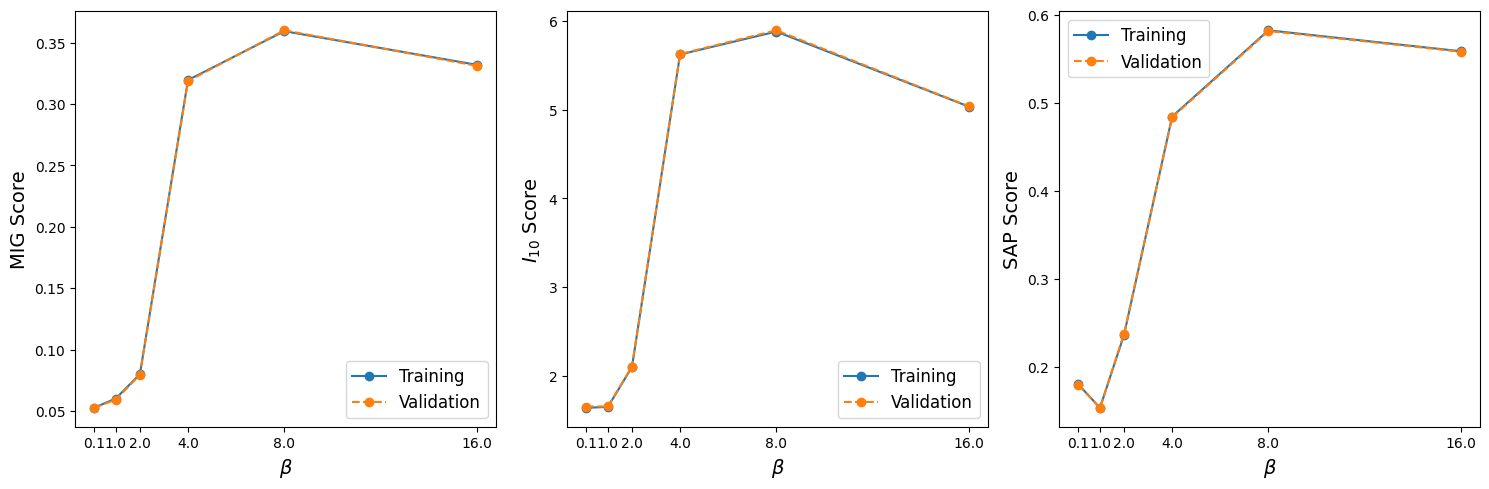

In [10]:
def plot_dis_scores_across_betas(train_mig_scores, val_mig_scores, train_I10_scores, val_I10_scores, train_sap_scores, val_sap_scores):
    """
    Plot disentanglement scores (MIG, I10, SAP) across beta values for training and validation datasets.

    Args:
        train_mig_scores (list): Training MIG scores for each beta value.
        val_mig_scores (list): Validation MIG scores for each beta value.
        train_I10_scores (list): Training I10 scores for each beta value.
        val_I10_scores (list): Validation I10 scores for each beta value.
        train_sap_scores (list): Training SAP scores for each beta value.
        val_sap_scores (list): Validation SAP scores for each beta value.
    """
    plt.figure(figsize=(15, 5))

    # Plot MIG Scores
    plt.subplot(1, 3, 1)
    plt.plot(BETAS, train_mig_scores, marker='o', label="Training", linestyle='-')
    plt.plot(BETAS, val_mig_scores, marker='o', label="Validation", linestyle='--')
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel('MIG Score', fontsize=14)
    plt.xticks(BETAS)
    plt.legend(loc='best', fontsize=12)

    # Plot I10 Scores
    plt.subplot(1, 3, 2)
    plt.plot(BETAS, train_I10_scores, marker='o', label="Training", linestyle='-')
    plt.plot(BETAS, val_I10_scores, marker='o', label="Validation", linestyle='--')
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel(r'$I_{10}$ Score', fontsize=14)
    plt.xticks(BETAS)
    plt.legend(loc='best', fontsize=12)

    # Plot SAP Scores
    plt.subplot(1, 3, 3)
    plt.plot(BETAS, train_sap_scores, marker='o', label="Training", linestyle='-')
    plt.plot(BETAS, val_sap_scores, marker='o', label="Validation", linestyle='--')
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel('SAP Score', fontsize=14)
    plt.xticks(BETAS)
    plt.legend(loc='best', fontsize=12)

    plt.tight_layout()
    plt.savefig(f"{SAVE_PATH}dis_scores_plot_across_betas.png", bbox_inches='tight')
    plt.show()

# Plot disentanglement scores across beta values
plot_dis_scores_across_betas(train_mig_scores, val_mig_scores, train_I10_scores, val_I10_scores, train_sap_scores, val_sap_scores)

In [11]:
# Load BCE, KL, and total loss for different beta values
train_bce_loss_hist_beta_01 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_0.1.npy')[-1]
train_bce_loss_hist_beta_1 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_1.npy')[-1]
train_bce_loss_hist_beta_2 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_2.npy')[-1]
train_bce_loss_hist_beta_4 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_4.npy')[-1]
train_bce_loss_hist_beta_8 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_8.npy')[-1]
train_bce_loss_hist_beta_16 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_16.npy')[-1]

train_kl_loss_hist_beta_01 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_0.1.npy')[-1]
train_kl_loss_hist_beta_1 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_1.npy')[-1]
train_kl_loss_hist_beta_2 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_2.npy')[-1]
train_kl_loss_hist_beta_4 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_4.npy')[-1]
train_kl_loss_hist_beta_8 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_8.npy')[-1]
train_kl_loss_hist_beta_16 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_16.npy')[-1]

train_loss_hist_beta_01 = np.load(f'{SAVE_PATH}train_loss_hist_beta_0.1.npy')[-1]
train_loss_hist_beta_1 = np.load(f'{SAVE_PATH}train_loss_hist_beta_1.npy')[-1]
train_loss_hist_beta_2 = np.load(f'{SAVE_PATH}train_loss_hist_beta_2.npy')[-1]
train_loss_hist_beta_4 = np.load(f'{SAVE_PATH}train_loss_hist_beta_4.npy')[-1]
train_loss_hist_beta_8 = np.load(f'{SAVE_PATH}train_loss_hist_beta_8.npy')[-1]
train_loss_hist_beta_16 = np.load(f'{SAVE_PATH}train_loss_hist_beta_16.npy')[-1]

val_bce_loss_hist_beta_01 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_0.1.npy')[-1]
val_bce_loss_hist_beta_1 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_1.npy')[-1]
val_bce_loss_hist_beta_2 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_2.npy')[-1]
val_bce_loss_hist_beta_4 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_4.npy')[-1]
val_bce_loss_hist_beta_8 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_8.npy')[-1]
val_bce_loss_hist_beta_16 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_16.npy')[-1]

val_kl_loss_hist_beta_01 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_0.1.npy')[-1]
val_kl_loss_hist_beta_1 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_1.npy')[-1]
val_kl_loss_hist_beta_2 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_2.npy')[-1]
val_kl_loss_hist_beta_4 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_4.npy')[-1]
val_kl_loss_hist_beta_8 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_8.npy')[-1]
val_kl_loss_hist_beta_16 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_16.npy')[-1]

val_loss_hist_beta_01 = np.load(f'{SAVE_PATH}val_loss_hist_beta_0.1.npy')[-1]
val_loss_hist_beta_1 = np.load(f'{SAVE_PATH}val_loss_hist_beta_1.npy')[-1]
val_loss_hist_beta_2 = np.load(f'{SAVE_PATH}val_loss_hist_beta_2.npy')[-1]
val_loss_hist_beta_4 = np.load(f'{SAVE_PATH}val_loss_hist_beta_4.npy')[-1]
val_loss_hist_beta_8 = np.load(f'{SAVE_PATH}val_loss_hist_beta_8.npy')[-1]
val_loss_hist_beta_16 = np.load(f'{SAVE_PATH}val_loss_hist_beta_16.npy')[-1]

In [12]:
# Append all BCE into a single array
train_bce = np.array([
    train_bce_loss_hist_beta_01,
    train_bce_loss_hist_beta_1,
    train_bce_loss_hist_beta_2,
    train_bce_loss_hist_beta_4,
    train_bce_loss_hist_beta_8,
    train_bce_loss_hist_beta_16
])

val_bce = np.array([
    val_bce_loss_hist_beta_01,
    val_bce_loss_hist_beta_1,
    val_bce_loss_hist_beta_2,
    val_bce_loss_hist_beta_4,
    val_bce_loss_hist_beta_8,
    val_bce_loss_hist_beta_16
])

# Append all KL into a single array
train_kl = np.array([
    train_kl_loss_hist_beta_01,
    train_kl_loss_hist_beta_1,
    train_kl_loss_hist_beta_2,
    train_kl_loss_hist_beta_4,
    train_kl_loss_hist_beta_8,
    train_kl_loss_hist_beta_16
])

val_kl = np.array([
    val_kl_loss_hist_beta_01,
    val_kl_loss_hist_beta_1,
    val_kl_loss_hist_beta_2,
    val_kl_loss_hist_beta_4,
    val_kl_loss_hist_beta_8,
    val_kl_loss_hist_beta_16
])

# Append all total losses into a single array
train_losses = np.array([
    train_loss_hist_beta_01,
    train_loss_hist_beta_1,
    train_loss_hist_beta_2,
    train_loss_hist_beta_4,
    train_loss_hist_beta_8,
    train_loss_hist_beta_16
])

val_losses = np.array([
    val_loss_hist_beta_01,
    val_loss_hist_beta_1,
    val_loss_hist_beta_2,
    val_loss_hist_beta_4,
    val_loss_hist_beta_8,
    val_loss_hist_beta_16
])

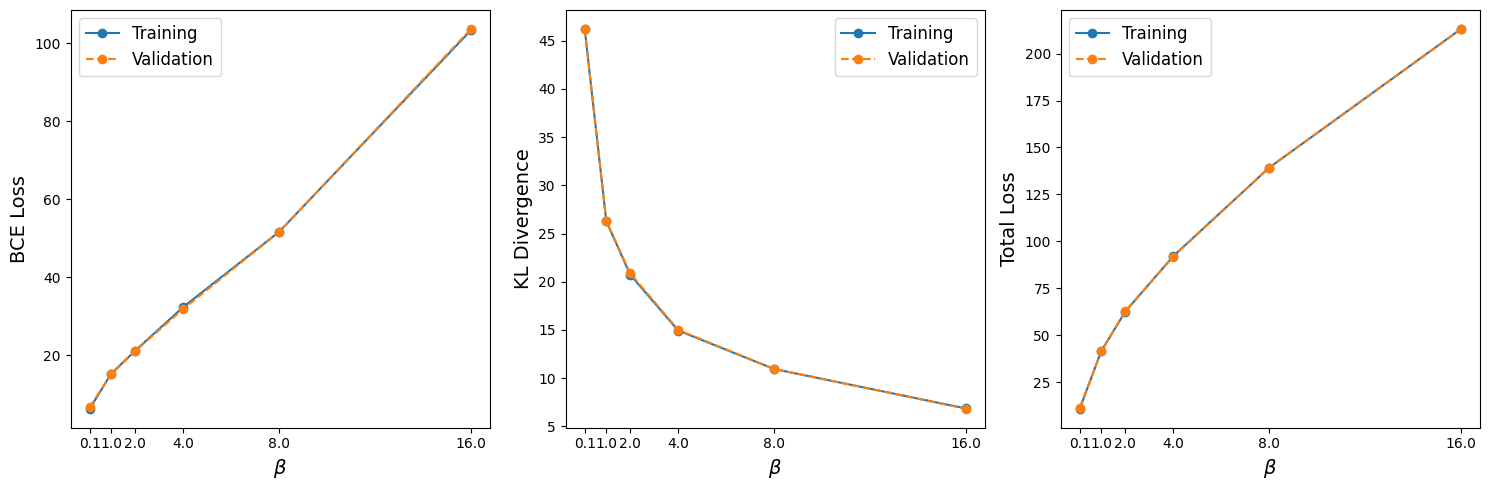

In [13]:
def plot_losses_across_betas(train_bce, val_bce, train_kl, val_kl, train_losses, val_losses):
    """
    Plot BCE Loss, KL Divergence, and Total Loss across beta values for training and validation datasets.

    Args:
        train_bce (list): Training BCE losses for each beta value.
        val_bce (list): Validation BCE losses for each beta value.
        train_kl (list): Training KL divergences for each beta value.
        val_kl (list): Validation KL divergences for each beta value.
        train_losses (list): Training total losses for each beta value.
        val_losses (list): Validation total losses for each beta value.
    """
    plt.figure(figsize=(15, 5))

    # Plot BCE Loss
    plt.subplot(1, 3, 1)
    plt.plot(BETAS, train_bce, marker='o', label="Training", linestyle='-')
    plt.plot(BETAS, val_bce, marker='o', label="Validation", linestyle='--')
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel('BCE Loss', fontsize=14)
    plt.xticks(BETAS)
    plt.legend(loc='best', fontsize=12)

    # Plot KL Divergence
    plt.subplot(1, 3, 2)
    plt.plot(BETAS, train_kl, marker='o', label="Training", linestyle='-')
    plt.plot(BETAS, val_kl, marker='o', label="Validation", linestyle='--')
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel('KL Divergence', fontsize=14)
    plt.xticks(BETAS)
    plt.legend(loc='best', fontsize=12)

    # Plot Total Loss
    plt.subplot(1, 3, 3)
    plt.plot(BETAS, train_losses, marker='o', label="Training", linestyle='-')
    plt.plot(BETAS, val_losses, marker='o', label="Validation", linestyle='--')
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel('Total Loss', fontsize=14)
    plt.xticks(BETAS)
    plt.legend(loc='best', fontsize=12)

    plt.tight_layout()
    plt.savefig(f"{SAVE_PATH}losses_plot_across_betas.png", bbox_inches='tight')
    plt.show()

# Plot losses across beta values
plot_losses_across_betas(train_bce, val_bce, train_kl, val_kl, train_losses, val_losses)